# Module 2 Assignment - Twitter Dataset

In [1]:
import pandas as pd

# Load the Kaggle Twitter dataset
df = pd.read_csv('downloads/sample_twitter_network.csv')

# Display the first few rows to inspect the data
df.head()

,user_id,follower_id
0,user_5,user_20
1,user_6,user_19
2,user_14,user_20
3,user_2,user_4
4,user_11,user_10


# Data Cleaning

In [2]:
df = df.drop_duplicates()

# Drop rows with missing follower data
df = df.dropna(subset=['follower_id'])
df.head()

,user_id,follower_id
0,user_5,user_20
1,user_6,user_19
2,user_14,user_20
3,user_2,user_4
4,user_11,user_10


# Graph Construction

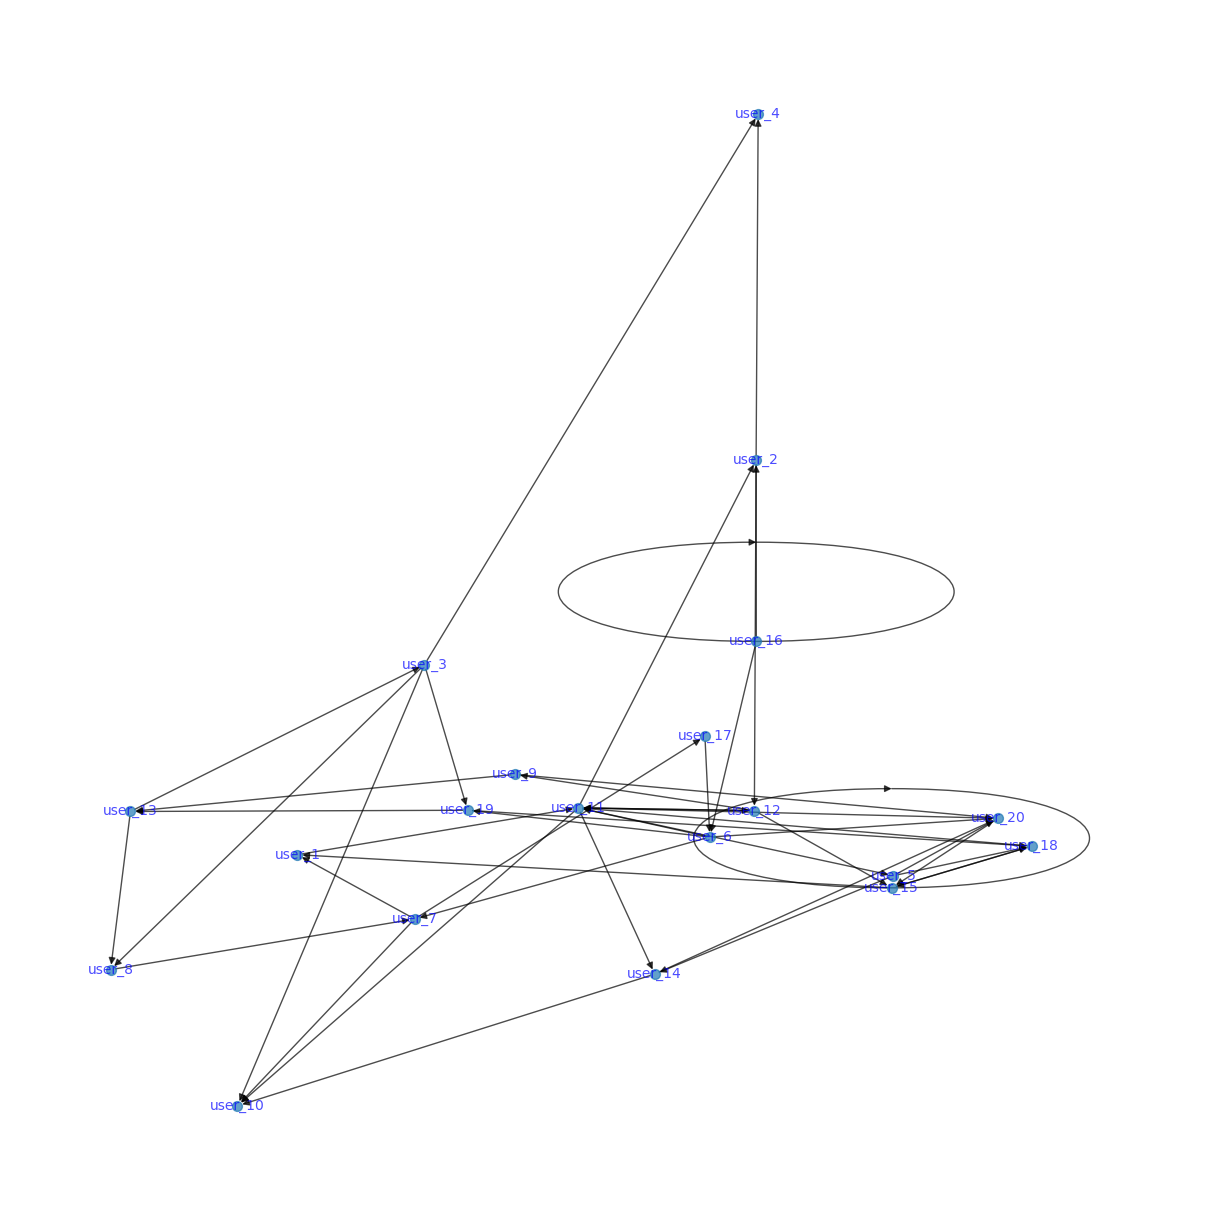

In [3]:
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Add edges from the dataset (user -> follower)
for index, row in df.iterrows():
    G.add_edge(row['user_id'], row['follower_id'])

# Visualize the graph (optional, may be large for a full dataset)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=50, font_size=10, font_color="blue", alpha=0.7)
plt.show()

# Defining Importance

In [4]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate PageRank
pagerank = nx.pagerank(G)

# Get the top 3 important nodes based on Degree Centrality and PageRank
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:3]

top_degree_centrality, top_pagerank

([('user_11', 0.5263157894736842),
  ('user_15', 0.3684210526315789),
  ('user_20', 0.3157894736842105)],
 [('user_11', 0.13874321519247515),
  ('user_15', 0.11332599961192324),
  ('user_10', 0.07465262564859051)])

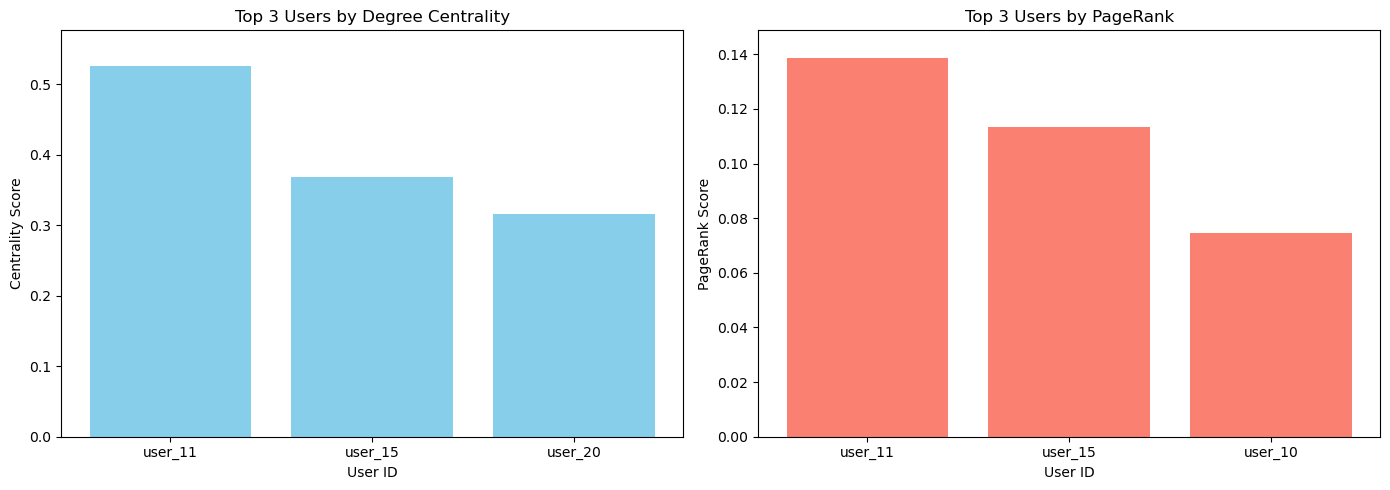

In [5]:
import matplotlib.pyplot as plt

# Extract user IDs and their scores for both centrality measures
degree_users, degree_scores = zip(*top_degree_centrality)
pagerank_users, pagerank_scores = zip(*top_pagerank)

# Set up the figure
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Degree Centrality
axs[0].bar(degree_users, degree_scores, color='skyblue')
axs[0].set_title('Top 3 Users by Degree Centrality')
axs[0].set_ylabel('Centrality Score')
axs[0].set_xlabel('User ID')
axs[0].set_ylim(0, max(degree_scores) + 0.05)

# Plot PageRank
axs[1].bar(pagerank_users, pagerank_scores, color='salmon')
axs[1].set_title('Top 3 Users by PageRank')
axs[1].set_ylabel('PageRank Score')
axs[1].set_xlabel('User ID')
axs[1].set_ylim(0, max(pagerank_scores) + 0.01)

# Adjust layout and show
plt.tight_layout()
plt.show()